In [1]:
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
import pickle

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn import preprocessing

from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import GridSearchCV,TimeSeriesSplit,HalvingGridSearchCV
from sklearn.kernel_ridge import KernelRidge

In [2]:
df_train=pd.read_csv("/Users/luca/Desktop/GEFCom2014 Data/Load/L-train.csv")

y_train=df_train["LOAD"]
X_train=df_train[["DAY","MONTH","HOUR","DAY_OF_WEEK","IS_HOLIDAY","w_avg"]]

df_test=pd.read_csv(f"/Users/luca/Desktop/GEFCom2014 Data/Load/Task 1/L1-test_clean.csv")

X_test=df_test[["DAY",  "MONTH",  "HOUR",  "DAY_OF_WEEK",  "IS_HOLIDAY",  "w_avg"]]
y_test=df_test["LOAD"]

In [3]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [5]:
# init model
# krn_ridge_blueprint=KernelRidge(kernel="rbf")

# param_grid = {"gamma":[1,10,100,0.5,1e-1],"alpha":[100,1000,10,1]}

# krn_ridge = HalvingGridSearchCV(krn_ridge_blueprint, param_grid, scoring="neg_mean_squared_error").fit(X_train_scaled, y_train)

In [7]:
X_train.iloc[42000]

DAY            17.00
MONTH          10.00
HOUR            1.00
DAY_OF_WEEK     5.00
IS_HOLIDAY      0.00
w_avg          49.68
Name: 42000, dtype: float64

In [8]:
# 42000 data 16 minutes 26.9s
# 45000 data 23m 47.0s
krn_ridge = KernelRidge(alpha=1, gamma=1, kernel="rbf")
krn_ridge.fit(X_train_scaled[:45000], y_train[:45000])

KernelRidge(gamma=1, kernel='rbf')

In [15]:
y_hat=krn_ridge.predict(X_test_scaled)

In [12]:
pickle.dump(krn_ridge, open('/Users/luca/Desktop/ThesisKernelMethods/experiments/point/models/krn_ridge_load_new.pkl', 'wb'))

In [4]:
krn_ridge=pickle.load(open('/Users/luca/Desktop/ThesisKernelMethods/experiments/point/models/krn_ridge_load_new.pkl', 'rb'))

In [5]:
y_hat=krn_ridge.predict(X_test_scaled)

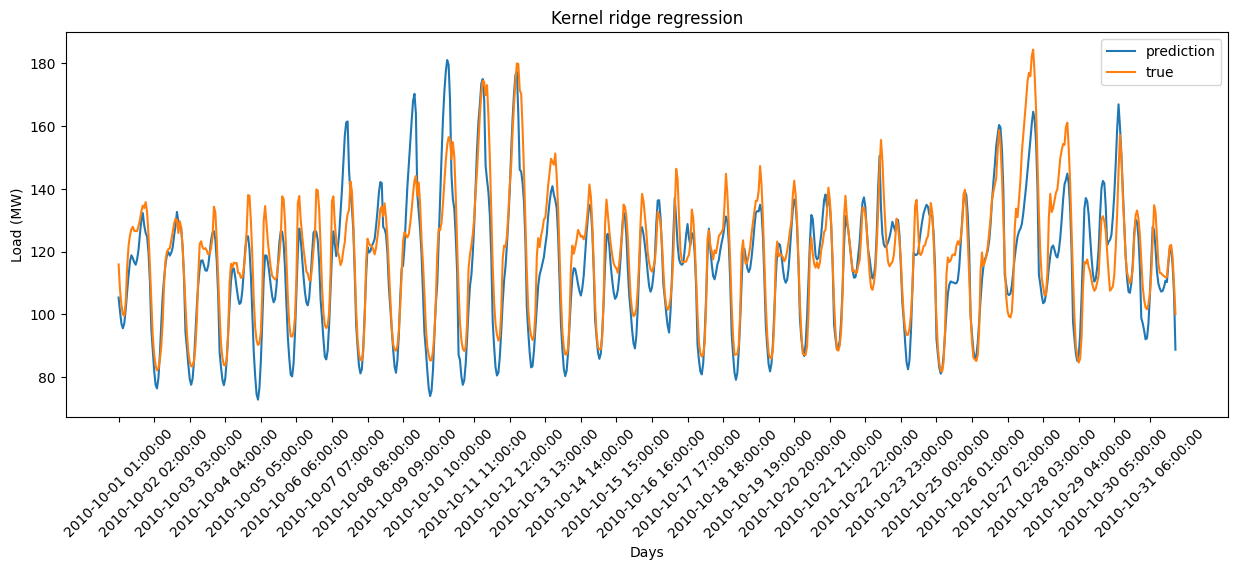

In [7]:
plt.figure(figsize=(15,5))
plt.plot(y_hat, label="prediction")
plt.plot(df_test["DS"], y_test, label="true")
plt.xticks(np.arange(0,len(y_test)+1,25),rotation=45)

plt.xlabel("Days")
plt.ylabel("Load (MW)")
plt.title("Kernel ridge regression")
plt.legend()
plt.show()

In [8]:
np.sqrt(mean_squared_error(y_test, y_hat))

9.861915281578275

In [37]:
mean_squared_error(y_test, y_hat)

101.51434589395942